In [2]:
import os
import sys
sys.path.append(os.path.abspath(".."))

import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'  # For sharper figures, but it takes more time
from tqdm import tqdm
import scipy as sp
from copy import deepcopy 

from lisatools.utils.constants import *
from lisatools.sensitivity  import AE1SensitivityMatrix
from bbhx.waveformbuild import BBHWaveformFD
import noise_generation as noise_generation
from tools.LISASimulator import LISASimulator
from tools.time_freq_likelihood import TimeFreqLikelihood
from tools.likelihood import get_dh, get_hh
import tools.likelihood as likelihood

No CuPy
No CuPy or GPU PhenomHM module.
No CuPy or GPU interpolation available.
No CuPy or GPU response available.


In [3]:
Tobs = YRSID_SI/12
dt = 5.
include_T_channel = False # Set to True if you want to include the T channel in the simulation, otherwise only A and E channels will be included.

wave_gen = BBHWaveformFD(amp_phase_kwargs=dict(run_phenomd=False))
sim = LISASimulator(Tobs=Tobs, dt=dt, wave_gen=wave_gen, include_T_channel=include_T_channel)

m1 = 3e5
m2 = 1.5e5
a1 = 0.2
a2 = 0.4
dist = 8 * PC_SI * 1e9  # distance in Gpc
phi_ref = np.pi/2
f_ref = 0.0
inc = np.pi/3
lam = np.pi/1.
beta = np.pi/4.
psi = np.pi/4.
t_ref = 0.95 * Tobs
#t_ref = round(0.9 * Tobs / dt) * dt  # round to the nearest multiple of dt, to force t_ref to be a part of t_array

parameters = np.array([m1, m2, a1, a2, dist, phi_ref, f_ref, inc, lam, beta, psi, t_ref])

modes = [(2,2), (2,1), (3,3), (3,2), (4,4), (4,3)]
waveform_kwargs = dict(length=1024, direct=False, fill=True, squeeze=False, modes=modes)

data_t, data_f, f_array, t_array, sens_mat = sim(seed = 42, parameters=parameters, waveform_kwargs=waveform_kwargs)

waveform_kwargs.update(freqs=f_array)
print(sim.SNR_optimal()[0])

1797.742203231165


In [6]:
np.abs(data_f[0])

array([6.92813301e-17, 5.51165067e-17, 7.74675320e-17, ...,
       8.89099416e-18, 1.77445826e-17, 1.61559137e-17], shape=(262985,))

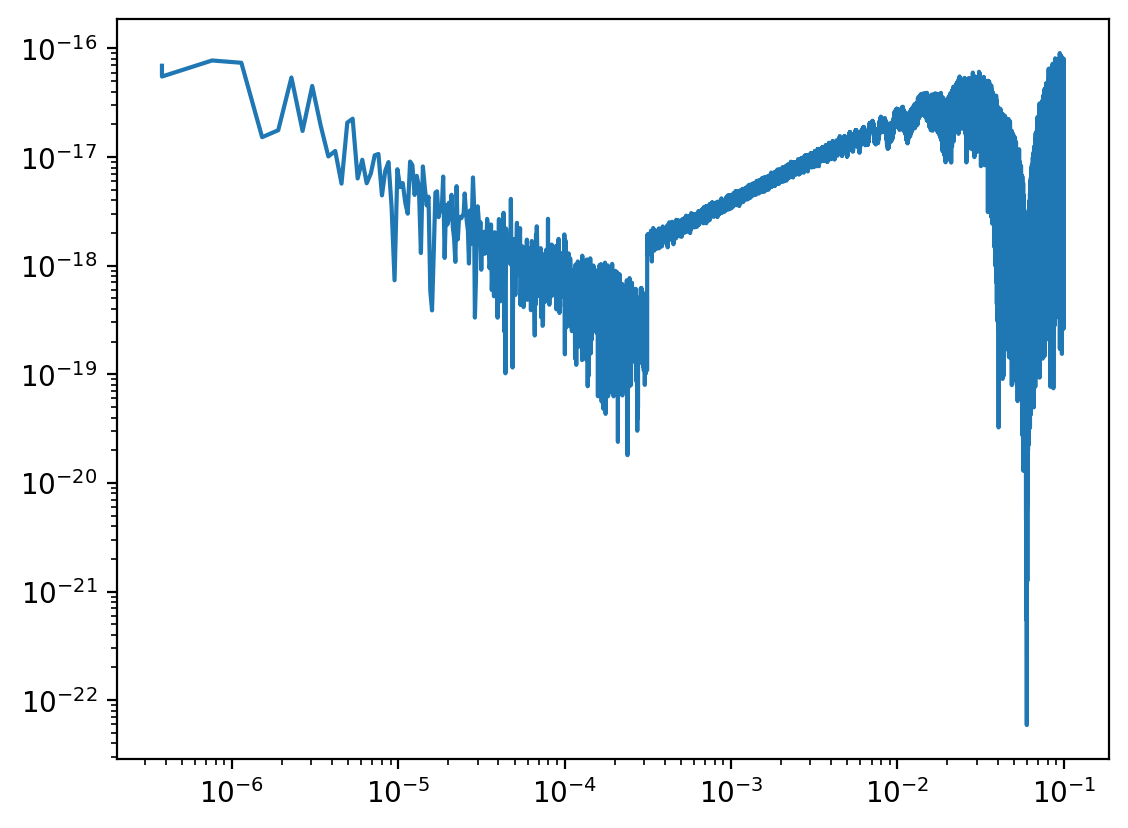

In [7]:
plt.loglog(f_array, np.abs(data_f[0]), label='A channel')

In [19]:
sim.signal_t[0,0]

array([1.71512085e-23, 1.85089267e-23, 1.80151625e-23, ...,
       1.67681736e-23, 1.62807122e-23, 1.76417326e-23], shape=(525968,))

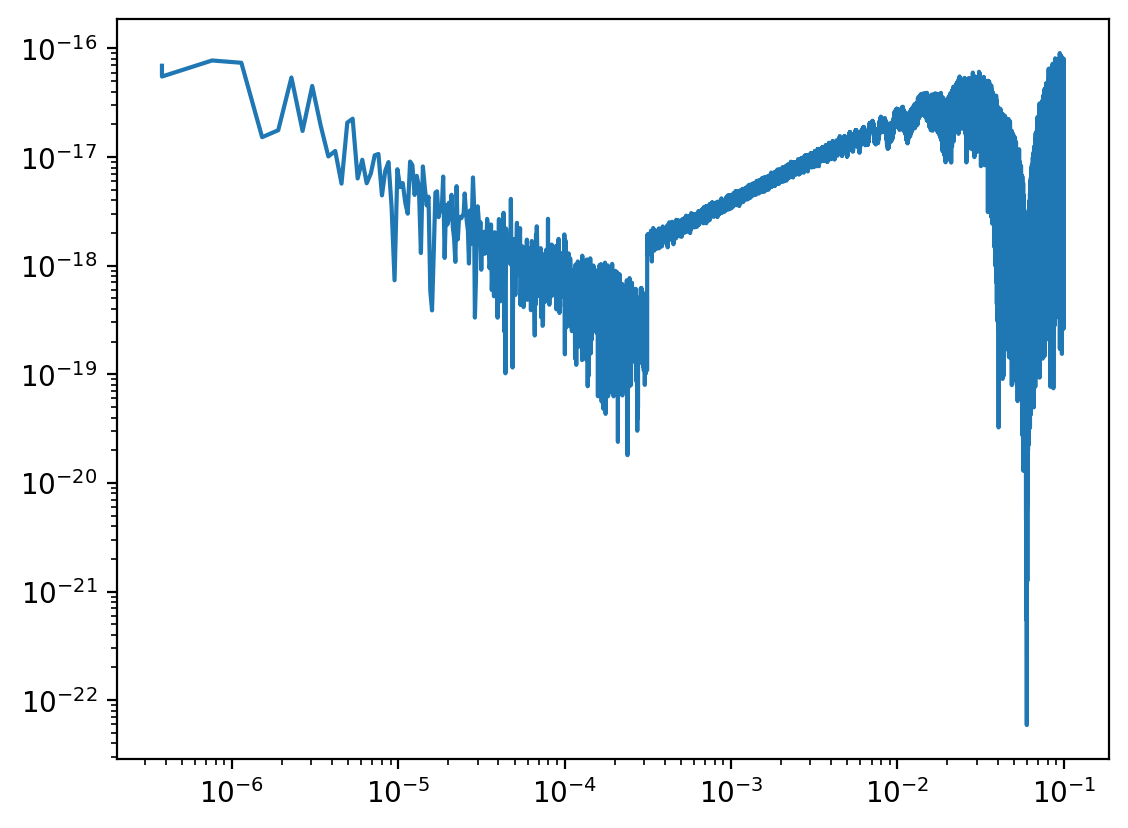

In [21]:
data_A_t = sim.noise_t[0] + sim.signal_t[0,0]
data_A_f = np.fft.rfft(data_A_t)
plt.loglog(f_array, np.abs(data_A_f), label='A channel with signal')

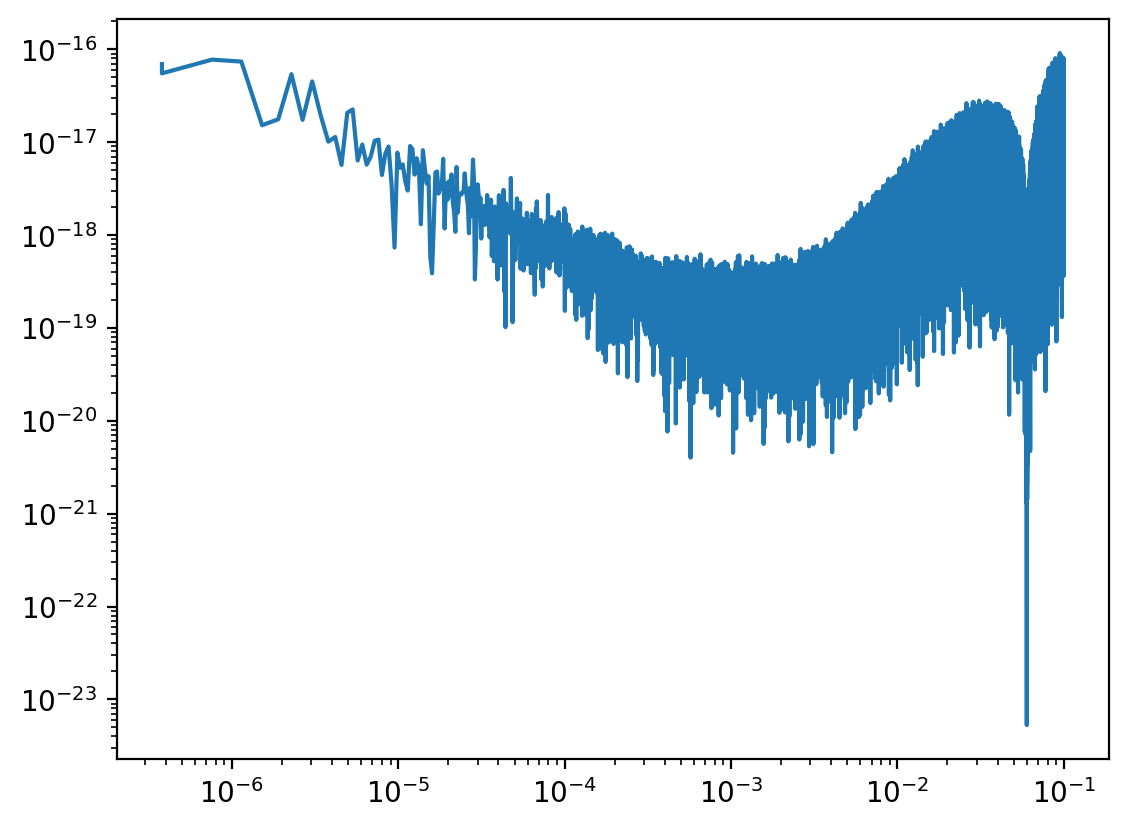

In [17]:
noise_f = np.fft.rfft(sim.noise_t[0])
plt.loglog(f_array, np.abs(noise_f), label='A channel')